<a href="https://colab.research.google.com/github/aviralrabbit13/Gene-Expression-ML/blob/main/Gene_exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML model on Gene Expression of Prostate Cancer

# Libraries and modules to be used:

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.utils import to_categorical   #Converts a class vector (integers) to binary class matrix.
from tensorflow.keras.backend import one_hot        #Computes the one-hot representation of an integer tensor

In [3]:
from sklearn.model_selection import train_test_split

# Dataset exploration:

In [16]:
os.listdir("drive/MyDrive/Gene")

['data.csv', 'labels.csv', 'split60_40']

In [5]:
data = pd.read_csv('drive/MyDrive/Gene/data.csv',delimiter = ',')
labels = pd.read_csv('drive/MyDrive/Gene/labels.csv',delimiter = ',')

In [17]:
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [7]:
labels.describe() 

,Unnamed: 0,Class
count,801,801
unique,801,5
top,sample_0,BRCA
freq,1,300


In [18]:
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [19]:
labels.head()

,Unnamed: 0,Class
0,sample_0,0
1,sample_1,1
2,sample_2,0
3,sample_3,0
4,sample_4,2


In [20]:
data.isnull()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
797,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
798,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
799,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
data['Unnamed: 0']

0        sample_0
1        sample_1
2        sample_2
3        sample_3
4        sample_4
          ...    
796    sample_796
797    sample_797
798    sample_798
799    sample_799
800    sample_800
Name: Unnamed: 0, Length: 801, dtype: object

In [22]:
labels['Unnamed: 0']

0        sample_0
1        sample_1
2        sample_2
3        sample_3
4        sample_4
          ...    
796    sample_796
797    sample_797
798    sample_798
799    sample_799
800    sample_800
Name: Unnamed: 0, Length: 801, dtype: object

In [23]:
labels['Class']

0      0
1      1
2      0
3      0
4      2
      ..
796    2
797    1
798    4
799    0
800    0
Name: Class, Length: 801, dtype: int64

In [8]:
labels['Class'].unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

We will change the datatype of the labels class to numeric values so we can use one_hot encoder or to-categorical.


In [9]:
labels = labels.replace({'PRAD': 0})
labels = labels.replace({'LUAD': 1})
labels = labels.replace({'BRCA': 2})
labels = labels.replace({'KIRC': 3})
labels = labels.replace({'COAD': 4})

In [10]:
labels['Class'].unique()


array([0, 1, 2, 3, 4])

In [33]:
df = pd.DataFrame(data)

In [32]:
#df.join(labels.set_index('Unnamed: 0'), on='Unnamed: 0'); we changed this unneccessary thing
df = pd.merge(df, labels, left_on='Unnamed: 0', right_on='Unnamed: 0', how='left').drop('Unnamed: 0', axis=1)

KeyError: ignored

In [24]:
df

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,1
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000,2
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000,1
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693,4
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000,0


We have dropped the labeling of individual samples but it will create no problem since we have unique samples and we have the entries from 0 to 800 respectively of each sample.

# Splitting the dataset into Testing, Training and validation set

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.4, random_state=42, shuffle = True)

In [36]:
#os.mkdir('drive/MyDrive/Gene/split60_40')
os.listdir('drive/MyDrive/Gene')

['data.csv', 'labels.csv', 'split60_40']

In [37]:
from pathlib import Path 
train_path = os.path.join('drive/MyDrive/Gene/split60_40','train.csv')
test_path = os.path.join('drive/MyDrive/Gene/split60_40','test.csv') 

In [38]:
train.to_csv(train_path, sep=',', index= False)
test.to_csv(test_path, sep=',', index= False)

In [39]:
print("Number of example in Training set " + str(train['Class'].count()));
print("Number of example in Test set "+ str(test['Class'].count()));
print("Number of example in Valid set "+str(test['Class'].count()))

Number of example in Training set 480
Number of example in Test set 321
Number of example in Valid set 321


In [40]:
test, valid = train_test_split(test, test_size = 0.5,random_state=42,shuffle = True)

In [41]:
test_path = os.path.join('drive/MyDrive/Gene/split60_40','test.csv')
valid_path = os.path.join('drive/MyDrive/Gene/split60_40','valid.csv')

In [42]:
test.to_csv(train_path, sep=',', index= False)
valid.to_csv(valid_path, sep=',', index= False)

In [43]:
print("number of example in Training set = "+ str(train['Class'].count()));
print("number of example in test set = "+ str(test['Class'].count()));
print("number of example in valid set = "+ str(test['Class'].count()));

number of example in Training set = 480
number of example in test set = 160
number of example in valid set = 160


In [44]:
train_labels = train['Class']
del train['Class']
train_features = train

In [45]:
test_labels = test['Class']
del test['Class']
test_features = test

valid_labels = valid['Class']
del valid['Class']
valid_features = valid

In [46]:
valid_labels

381    3
81     0
181    3
456    1
76     2
      ..
711    3
737    2
467    2
703    3
518    1
Name: Class, Length: 161, dtype: int64

In [47]:
valid_features

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
381,0.0,3.170101,3.060895,6.114013,9.746153,0.0,9.524634,0.612777,0.0,0.0,...,5.454926,7.577217,9.909059,5.208814,10.115837,11.606563,10.037368,9.246572,4.886316,0.000000
81,0.0,2.486663,4.057987,6.784059,9.741900,0.0,7.790603,1.155684,0.0,0.0,...,3.515700,8.594593,10.005863,4.031148,9.694583,10.371461,10.297386,9.239670,4.324307,0.000000
181,0.0,0.721154,1.697285,6.754634,9.837111,0.0,7.978058,0.868766,0.0,0.0,...,5.976316,7.807664,9.977309,0.868766,10.252571,12.590075,10.138771,9.233598,5.751429,0.000000
456,0.0,4.126527,3.887993,6.060731,8.763929,0.0,6.260750,1.031254,0.0,0.0,...,6.280257,8.995470,10.622674,2.752984,10.533028,12.077303,10.459001,9.650538,5.230142,0.605874
76,0.0,3.195537,2.275156,5.719778,9.145591,0.0,7.333683,1.192762,0.0,0.0,...,6.534924,9.382676,9.893725,7.298759,9.906667,11.913095,9.846816,9.708798,5.412016,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,0.0,1.889162,3.257524,5.979214,10.296159,0.0,8.182777,1.088684,0.0,0.0,...,5.577749,7.922971,9.770025,0.644687,9.484809,12.210032,10.270062,9.102585,9.324181,0.000000
737,0.0,3.998728,3.537644,6.336483,10.198433,0.0,6.605121,0.438825,0.0,0.0,...,5.782456,9.070140,9.589436,6.227893,10.301599,11.729030,10.140983,9.519872,8.503579,0.000000
467,0.0,3.144503,1.053667,6.893386,10.498221,0.0,8.181391,0.000000,0.0,0.0,...,4.906193,7.635769,9.747215,6.085119,9.461506,12.117328,9.241354,9.113622,4.823408,0.000000
703,0.0,4.143565,3.043834,6.211337,8.791908,0.0,7.691960,1.154907,0.0,0.0,...,7.238070,9.143623,10.484390,4.344878,10.448746,10.912785,10.373365,10.094183,3.857364,0.000000


In [48]:
test_labels

63     1
110    0
79     4
69     2
316    3
      ..
431    4
192    1
352    2
83     2
97     2
Name: Class, Length: 160, dtype: int64

In [49]:
test_features

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
63,0.000000,4.418817,3.555374,6.468829,9.777303,0.0,6.361089,0.000000,0.0,0.0,...,5.609722,8.692375,10.391888,2.116697,9.751472,11.838751,10.293035,9.147676,4.538966,0.000000
110,0.000000,0.000000,3.830610,5.595736,10.520864,0.0,9.021033,0.000000,0.0,0.0,...,5.009746,7.875669,9.844736,7.168492,8.639825,11.265838,9.713600,7.963919,4.537433,0.000000
79,0.000000,3.219029,2.284781,8.124178,10.386132,0.0,5.780310,0.521252,0.0,0.0,...,4.235850,8.706959,9.637483,0.521252,9.059715,12.218963,10.892148,9.083054,3.460572,0.000000
69,0.000000,2.471942,2.868292,7.696536,10.273143,0.0,6.713943,0.000000,0.0,0.0,...,5.333814,8.119590,10.329471,6.656920,9.024838,13.491289,10.173877,8.951643,6.222824,0.000000
316,0.000000,4.365686,4.142609,6.310825,8.623929,0.0,8.268182,1.436801,0.0,0.0,...,7.016452,8.868810,10.720501,1.995521,10.332137,11.305788,11.012834,9.786600,4.141212,0.512783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0.000000,2.603407,3.303620,8.546624,10.954603,0.0,6.526396,0.997473,0.0,0.0,...,4.750033,8.437918,9.373261,0.000000,8.604153,13.220469,9.442050,8.359108,4.518743,0.000000
192,0.531868,3.755486,1.868963,6.726123,10.859449,0.0,7.610154,0.000000,0.0,0.0,...,4.884266,8.129752,9.938672,6.847158,9.011046,11.632282,9.872284,9.073266,9.106317,0.000000
352,0.000000,3.045356,2.839234,5.992823,9.867693,0.0,6.527726,0.408277,0.0,0.0,...,6.116192,9.025466,10.556573,4.144291,10.082269,11.218805,10.592167,9.637623,4.598449,0.000000
83,0.000000,2.306437,2.063227,6.984339,9.921173,0.0,7.694170,0.630499,0.0,0.0,...,6.223498,10.050583,10.509716,5.891813,10.135286,11.475597,10.129296,10.229528,3.547030,0.000000


So now we have to analzise the data in each row and check if they neeed to be normalized and plot them and deduce statstical inference. 

In [50]:
train_labels

257    0
766    4
544    2
15     2
3      0
      ..
71     2
106    1
270    3
435    3
102    2
Name: Class, Length: 480, dtype: int64

In [51]:
labels['Class'].unique()

array([0, 1, 2, 3, 4])

We have 5 classes in total , so the final output layers must have 5 neurons. 
To make them into categorical data, we will use the util module from keras
but first we convert it into nummpy array with pandas

In [52]:
train_labels = pd.DataFrame(train_labels).to_numpy()


In [53]:
train_labels.shape

(480, 1)

In [54]:
test_labels = pd.DataFrame(test_labels).to_numpy()
valid_labels = pd.DataFrame(valid_labels).to_numpy()
train_features = pd.DataFrame(train_features).to_numpy()
test_features = pd.DataFrame(test_features).to_numpy()
valid_features = pd.DataFrame(valid_features).to_numpy()


to_categorical module need numeric value; so we might have to convert all this into numeric values

In [55]:
train_labels_categorical = to_categorical(train_labels,5)
train_labels_one_hot = tf.keras.backend.one_hot(train_labels, 5)

In [56]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import one_hot

We have a lot of features- 20531 features so can't plot them all.
We neeed to one hot encode our labels and check how many unique values are there in pandas to decide that many categories.

In [57]:
train_labels_categorical = to_categorical(train_labels,5)
train_labels_one_hot = tf.keras.backend.one_hot(train_labels, 5)

In [58]:
train_labels_categorical.shape

(480, 5)

In [59]:
valid_labels_categorical = to_categorical(valid_labels,5)
test_labels_categorical = to_categorical(test_labels,5)

In [60]:
labels = labels['Class'].replace(to_replace='PRAD', value =0, regex=True)
labels = labels['Class'].replace(to_replace='LUAD', value =1,regex=True)
labels = labels['Class'].replace(to_replace='BRCA', value =2,regex=True)
labels = labels['Class'].replace(to_replace='KIRC', value =3,regex=True)
labels = labels['Class'].replace(to_replace='COAD', value =4,regex=True)


KeyError: ignored

Both of these methods work the same way, but *one_hot method* give a tensorflow array type while *to_categorical* gives a numpy array

In [61]:
train_features[0]

array([ 0.        ,  4.39652943,  4.15279185, ..., 10.21771541,
        4.3483245 ,  0.30591217])

A single input has 20531 features 
Normalizing the data is better since the model would give a better idea about the relation.  
We will **normalize with tensorflow numpy array along the vertical axis -for each gene** ,
first running vertically downwards across rows (axis 0), and the second running horizontally across columns (axis 1).

In [62]:
train_features

array([[ 0.        ,  4.39652943,  4.15279185, ..., 10.21771541,
         4.3483245 ,  0.30591217],
       [ 0.        ,  3.35133151,  3.51227746, ...,  9.57867082,
         4.95142927,  0.        ],
       [ 0.        ,  2.6513158 ,  2.25794595, ..., 10.39690442,
         5.96270633,  0.        ],
       ...,
       [ 0.        ,  2.52839628,  2.62030488, ...,  9.27967093,
         4.18972969,  0.        ],
       [ 0.        ,  4.13419629,  3.7226081 , ..., 10.02350487,
         6.3917093 ,  0.        ],
       [ 0.        ,  2.99048296,  2.48735772, ..., 10.17624796,
         6.94138806,  0.        ]])

In [63]:
train_feature_norm = tf.keras.utils.normalize(train_features, axis=0, order=2)

In [64]:
train_feature_norm.shape

(480, 20531)

In [65]:
test_feature_norm = tf.keras.utils.normalize(test_features, axis=0, order=2)
valid_feature_norm = tf.keras.utils.normalize(valid_features, axis=0, order=2)

# **Model  building**

In [66]:
def model_1():
  model = tf.keras.Sequential([
                               tf.keras.layers.Dense(32,activation='relu',input_shape=(20531,),name='dense1_32'),
                               tf.keras.layers.Dense(64,activation='relu',name='dense1_64'),
                               tf.keras.layers.Dense(128,activation='relu',name='dense1_128'),
                               tf.keras.layers.Dense(128,activation='relu',name='dense2_128'),
                               tf.keras.layers.Dense(5,activation='softmax',name='last')
  ])
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  # We can choose a wide variety of optimizer and loss

  model.summary()

  return model

After compilation of the model once, we run it through a single epoch to see if its accepting the data and it adds a None layer by it self for each unit.

In [71]:
#os.mkdir('drive/MyDrive/Gene/model_1')
os.listdir('drive/MyDrive/Gene')

['data.csv', 'labels.csv', 'split60_40', 'model_1']

In [72]:
#os.mkdir('drive/MyDrive/Gene/model_1/saved')
os.listdir('drive/MyDrive/Gene/model_1')

['saved']

In [73]:
checkpoint_path = 'drive/MyDrive/Gene/model_1/saved'
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,monitor='val_loss',save_best_only=True,save_weights_only=False)

In [74]:
model_1 = model_1()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1_32 (Dense)           (None, 32)                657024    
                                                                 
 dense1_64 (Dense)           (None, 64)                2112      
                                                                 
 dense1_128 (Dense)          (None, 128)               8320      
                                                                 
 dense2_128 (Dense)          (None, 128)               16512     
                                                                 
 last (Dense)                (None, 5)                 645       
                                                                 
Total params: 684,613
Trainable params: 684,613
Non-trainable params: 0
_________________________________________________________________


In [75]:
history_1 = model_1.fit(train_feature_norm,train_labels_categorical,epochs=50,validation_data=(valid_feature_norm,valid_labels_categorical),callbacks=[cp_callback])


Epoch 1/50
15/15 [==============================] - 2s 94ms/step - loss: 1.4474 - accuracy: 0.3146 - val_loss: 1.1016 - val_accuracy: 0.5217
Epoch 2/50
15/15 [==============================] - 1s 70ms/step - loss: 0.8700 - accuracy: 0.7125 - val_loss: 0.3390 - val_accuracy: 0.8758
Epoch 3/50
15/15 [==============================] - 1s 72ms/step - loss: 0.2945 - accuracy: 0.9375 - val_loss: 0.0931 - val_accuracy: 0.9814
Epoch 4/50
15/15 [==============================] - 1s 70ms/step - loss: 0.0705 - accuracy: 0.9979 - val_loss: 0.0248 - val_accuracy: 0.9876
Epoch 5/50
15/15 [==============================] - 1s 71ms/step - loss: 0.0247 - accuracy: 0.9979 - val_loss: 0.0173 - val_accuracy: 0.9938
Epoch 6/50
15/15 [==============================] - 1s 80ms/step - loss: 0.0098 - accuracy: 0.9979 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0054 - accuracy: 0.9979 - val_loss: 0.0378 - val_accuracy: 0.9938
Epoch 8/50
15

Checking the Graph

In [76]:
def plot(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs,acc,'b')
  plt.plot(epochs,val_acc,'r')
  plt.xlabel('Training Accuracy')
  plt.xlabel('Validation Accuracy')
  plt.figure()
  plt.show()

  plt.plot(epochs,loss,'b')
  plt.plot(epochs,val_loss,'r')
  plt.xlabel('Training Loss')
  plt.xlabel('Validation Loss')
  plt.figure()
  plt.show()

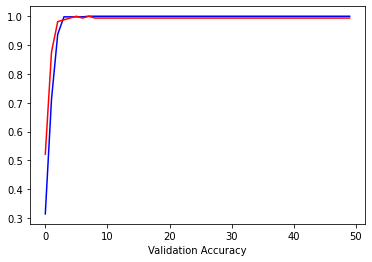

<Figure size 432x288 with 0 Axes>

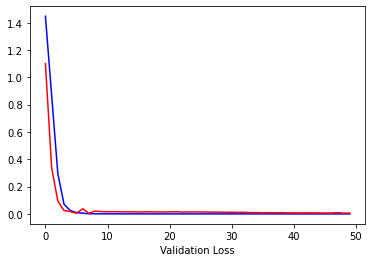

<Figure size 432x288 with 0 Axes>

In [77]:
plot(history_1)

In [78]:
print(model_1.metrics_names)


['loss', 'accuracy']


In [79]:
loss1 , accuracy1 = model_1.evaluate(valid_feature_norm,valid_labels_categorical)

6/6 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 0.9938


In [80]:
print(loss1 , accuracy1)

0.00602765055373311 0.9937888383865356


So much accurate model doesn't fit the real world, so we need improve and rebuild the model to meet real world accuracy.